In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel("1975.xlsx")
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,1975,17085,145,33,3512
1,1975,17724,397,36,3523
2,1975,17957,375,22,3527
3,1975,17147,430,39,3521
4,1975,17818,360,17,3567
...,...,...,...,...,...
1828,1975,17428,292,35,3542
1829,1975,17295,332,26,3555
1830,1975,17587,264,42,3529
1831,1975,17693,352,42,3536


In [5]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1833, 5)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1833 entries, 0 to 1832
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1833 non-null   int64
 1   Maximum length (m))  1833 non-null   int64
 2   Recession(m),        1833 non-null   int64
 3   Rate/yr(m)           1833 non-null   int64
 4   Snout altitude (m)   1833 non-null   int64
dtypes: int64(5)
memory usage: 71.7 KB


In [7]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [8]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  71
Number  of instances of models:  1833


In [9]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [10]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [11]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,1975,17085,145,33,3512
1,1975,17724,397,36,3523
2,1975,17957,375,22,3527
3,1975,17147,430,39,3521
4,1975,17818,360,17,3567


In [12]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,-0.0278,0.0130,0.0397
"Recession(m),",NaN,-0.0278,1.0000,0.0087,0.0332
Rate/yr(m),NaN,0.0130,0.0087,1.0000,-0.0128
Snout altitude (m),NaN,0.0397,0.0332,-0.0128,1.0000


In [13]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))    1.0000
Snout altitude (m)     0.0397
Rate/yr(m)             0.0130
Recession(m),         -0.0278
Year                      NaN
Name: Maximum length (m)), dtype: float64

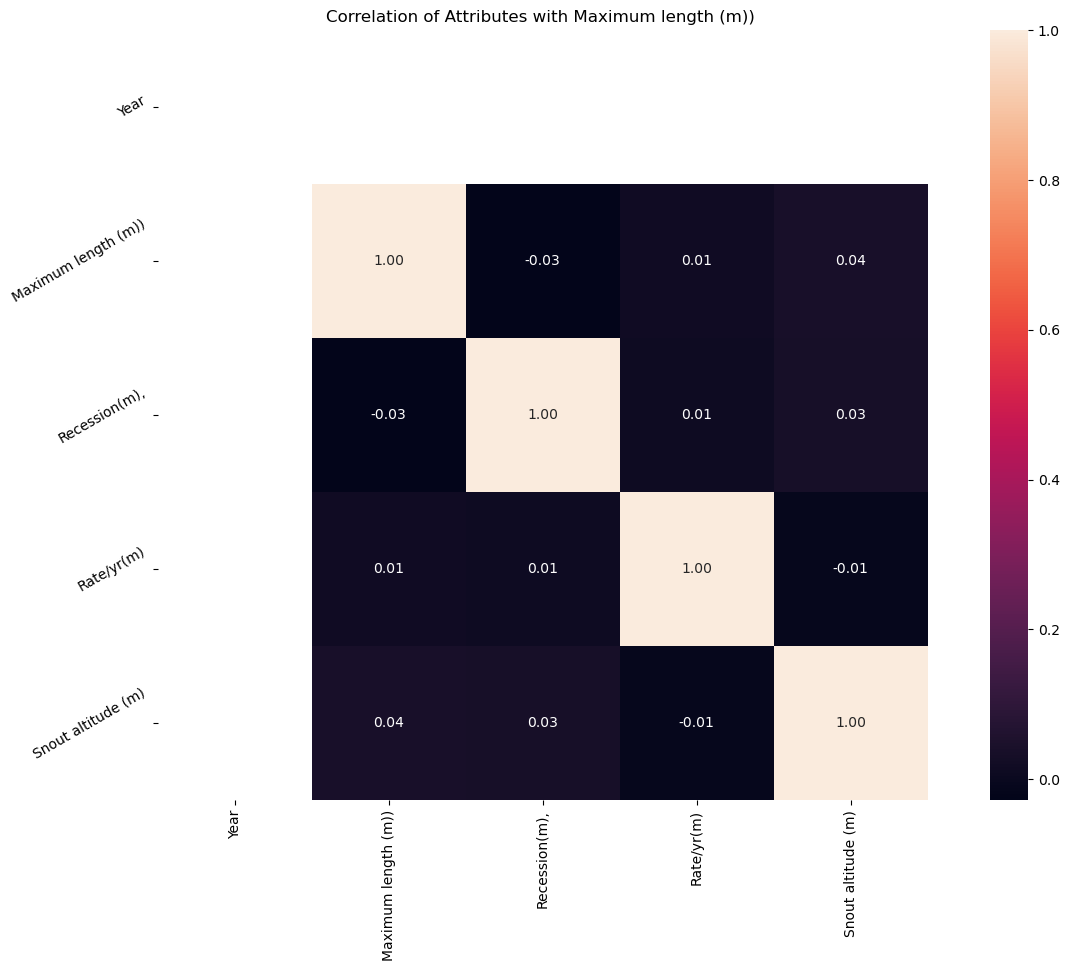

In [14]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [15]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [16]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,833.0000","1,833.0000","1,833.0000","1,833.0000","1,833.0000"
mean,"1,975.0000","17,543.9078",219.6410,27.4763,"3,531.7409"
std,0.0000,301.1463,127.0470,8.6456,20.1068
min,"1,975.0000","17,035.0000",0.0000,13.0000,"3,497.0000"
25%,"1,975.0000","17,275.0000",111.0000,20.0000,"3,515.0000"
50%,"1,975.0000","17,548.0000",219.0000,27.0000,"3,531.0000"
75%,"1,975.0000","17,803.0000",328.0000,35.0000,"3,549.0000"
max,"1,975.0000","18,067.0000",440.0000,42.0000,"3,567.0000"


In [17]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

Year
1975   1.0000
Name: count, dtype: float64

Recession(m),
209   0.0071
356   0.0071
41    0.0055
288   0.0055
196   0.0055
       ...  
86    0.0005
243   0.0005
27    0.0005
429   0.0005
380   0.0005
Name: count, Length: 436, dtype: float64

Rate/yr(m)
16   0.0426
26   0.0420
34   0.0409
29   0.0398
42   0.0393
21   0.0387
33   0.0382
24   0.0376
39   0.0366
17   0.0360
37   0.0355
13   0.0355
25   0.0338
30   0.0327
35   0.0322
19   0.0311
36   0.0311
20   0.0306
15   0.0306
28   0.0306
14   0.0300
27   0.0300
40   0.0295
22   0.0295
41   0.0295
32   0.0295
23   0.0284
31   0.0273
18   0.0262
38   0.0251
Name: count, dtype: float64

Snout altitude (m)
3530   0.0202
3523   0.0202
3510   0.0196
3501   0.0191
3532   0.0175
        ...  
3500   0.0098
3536   0.0093
3507   0.0087
3557   0.0082
3505   0.0082
Name: count, Length: 71, dtype: float64



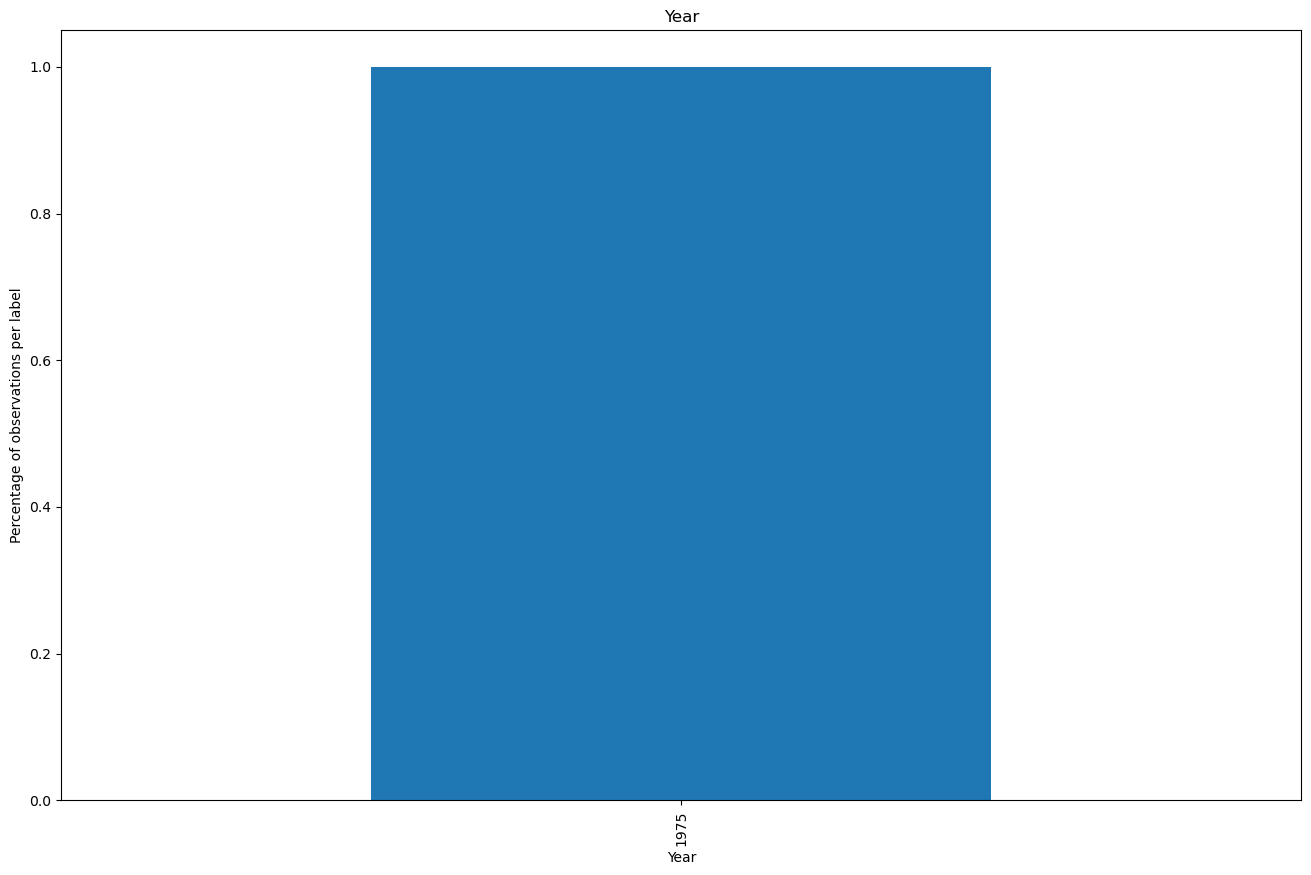

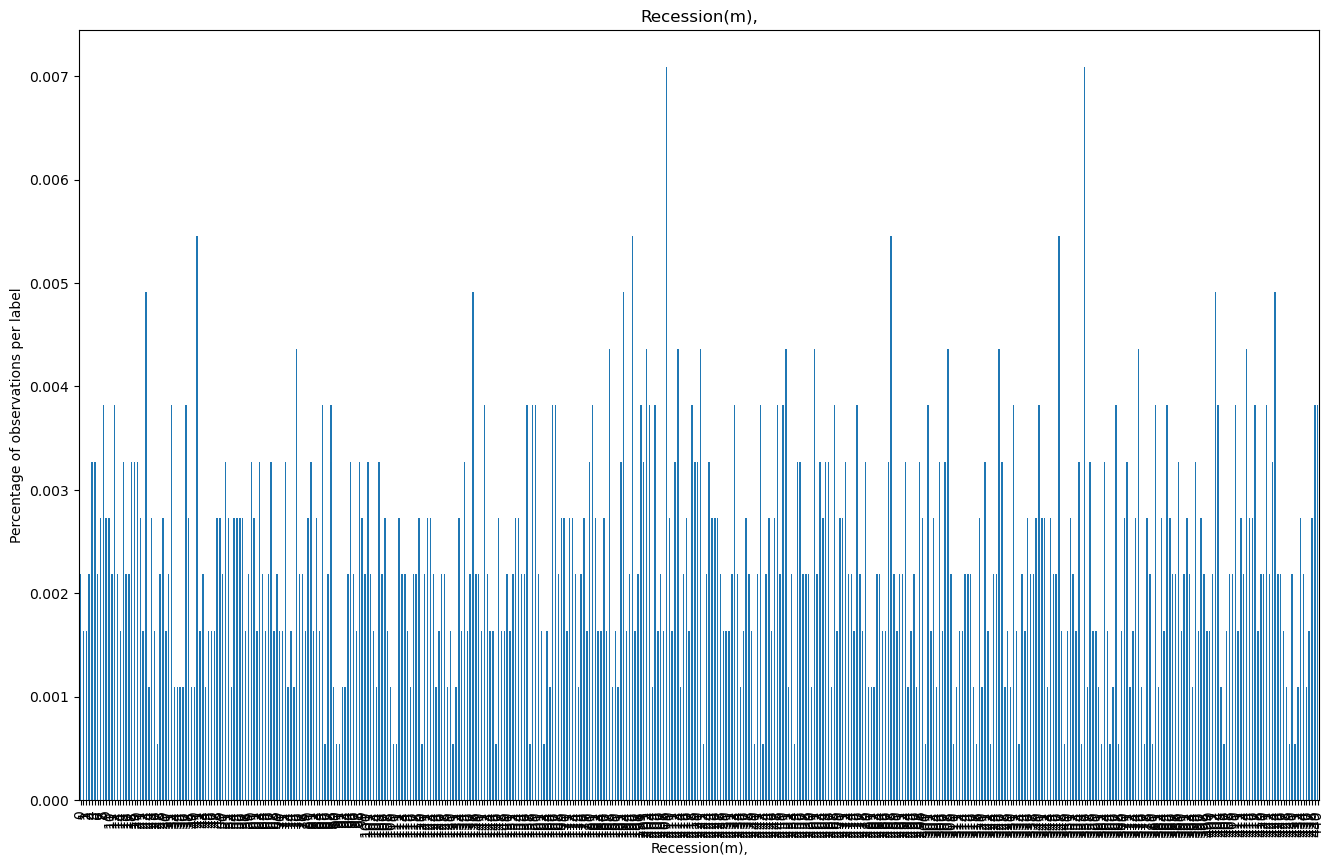

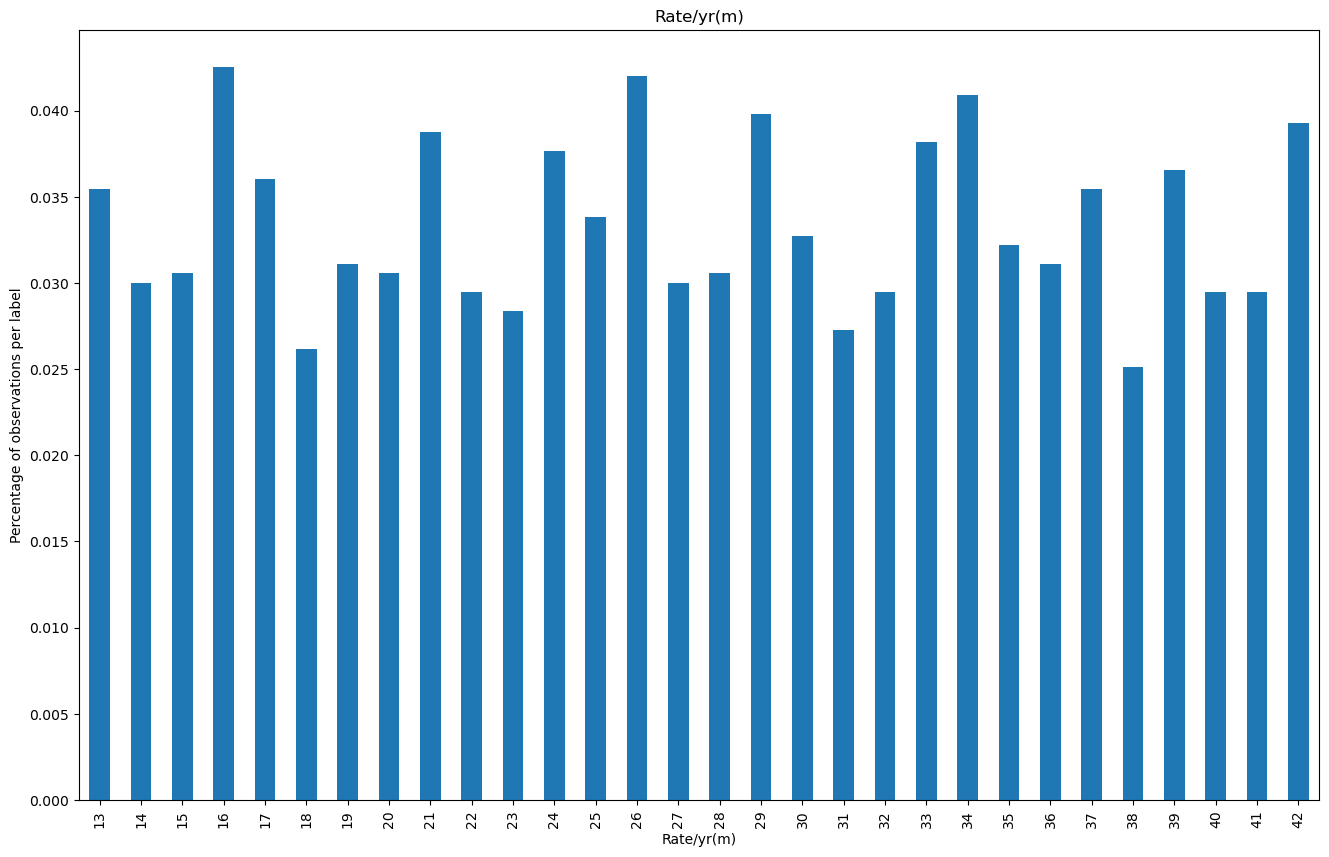

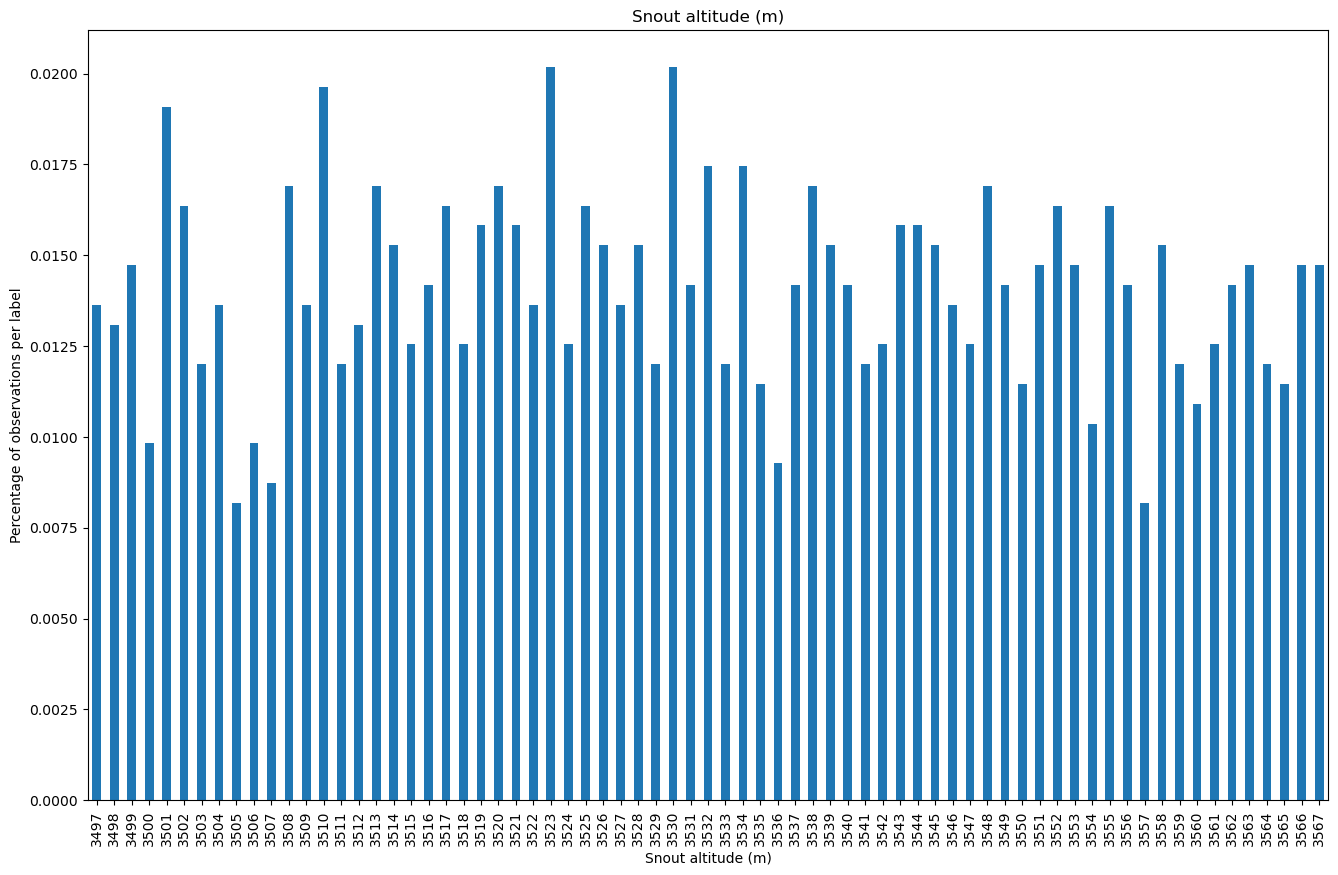

In [18]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()